# Manipulating Distributions

One of the most helpful skills that you will eventually develop as a data scientist is the ability to generate synthetic data in order to run simulations and create data visualisations that show what you think your data is going to look like before you actually expend the resources in order to be able to run the analysis. 

Getting to this point is still a bit of a ways away for us, but we can start today by taking baby steps forward.

For today's **daily challenge** we're going to apply a bit of what we learned this week with Normal Distributions and have a bit of a throwback to the land of Data Viz with a topical challenge. 

Today we are asking you to try to re-create the "Flattening the Curve" visualisation that depicts the importance of taking precautionary measures to slow the spread of a virus or disease.

Below is a great example of a simple data visualisation that tells a story with only a few ideas but is very important for public health understanding. 

* [Original Link Here](https://www.vox.com/2020/3/10/21171481/coronavirus-us-cases-quarantine-cancellation)

![alt text](image.png "Flattening the Curve")

Today we want you to re-create this chart using any combination of matplotlib or seaborn. At a minimum, you should create both distributions and have your axes labeled with a clear title. If you want to go further, you can try to annotate the chart with the lines and arrows provided and match the colors. 

To do this you need to...

* Generate some synthetic data with numpy
* Change the parameters of the distributions to approximate the correct shapes.
* Plot both distributions on the same plot
* Annotate the graph accordingly.

Try to make your chart as close as you can to the one above so that it could be included in a publication!

Best of luck! 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

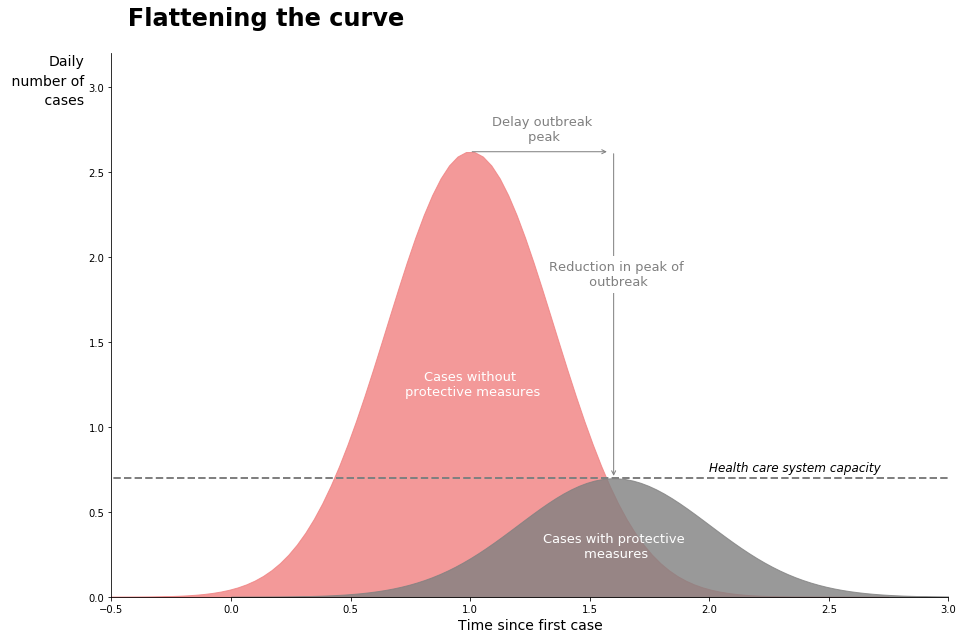

In [39]:
mu = 1
variance = 0.7
sigma = (variance)**1/2

fig, ax = plt.subplots(figsize = (15,10))

x1 = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y1 = stats.norm.pdf(x1, mu, sigma) * 2.3

mu1 = mu + 0.6
sigma1 = 0.4
x2 = np.linspace(mu1 - 4*sigma1, mu1 + 4*sigma1, 100)
y2 = stats.norm.pdf(x2, mu1, sigma1) * 0.7

ax.plot(x1,y1, color ='lightcoral', alpha = 0)
ax.plot(x2,y2, color ='gray', alpha = 0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.fill_between(x1,0,y1, color = 'lightcoral', alpha = 0.8)
ax.fill_between(x2,0,y2, color = 'gray', alpha = 0.8)


#Line Annotations  
ax.annotate("",
            xy=(1.6, 0.7), 
            xytext=(1.6, 2.62), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color = 'gray')
            )
ax.annotate("",
            xy=(1.58, 2.62),
            xytext=(mu, 2.62), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color = 'gray')
            )
#Word annotations
ax.annotate("Health care system capacity", xy=(2,0.74),  xycoords='data',style = 'italic',fontsize = '12', color = 'black')
ax.annotate("Cases without\n protective measures", xy=(mu,1.25),  xycoords='data',fontsize = '13', ha="center", va="center", color = 'white')
ax.annotate("Cases with protective\n measures", xy=(mu1,0.3),  xycoords='data',fontsize = '13', ha="center", va="center", color = 'white')
ax.annotate("Delay outbreak\n peak", xy=((mu1+mu)/2,2.75),  xycoords='data',fontsize = '13', ha="center", va="center", color='gray')

#Has to be after the arrow annotations so that the white box around the words cuts the vertical arrow
ax.annotate("Reduction in peak of\n outbreak", xy=(mu1+0.01,1.9),  xycoords='data',fontsize = '13', ha="center", va="center", backgroundcolor = 'w',color='gray')
#Horizontal dotted line
plt.hlines(y= 0.7, xmin = -2, xmax = 3,linewidth=2, color='gray',linestyles= 'dashed')
#Setting title
plt.title('  Flattening the curve', loc = 'left', fontsize = 24, weight = 'bold', y=1.04)

#X and Y axes customisation
plt.ylim(0,3.2)
plt.xlim(-0.5,3) 
# plt.xticks([])
# plt.yticks([])
plt.xlabel('Time since first case', fontsize = '14')
plt.ylabel('Daily\n number of\n cases', fontsize = '14',rotation = 'horizontal',position = (0,0.9),horizontalalignment = 'right', linespacing = 1.5)

plt.show()

In [47]:
def two_pdfs(sigma = 0.35, sigma2= 0.4, delta_mu = 0.6, size_proportion = 2.3/0.7 ):
    """This function takes four integer or doubleinput parameters: sigma, sigma2, delta_mu, 
        and size_proportion it then returns a plot of two probability distribution functions
        shifted and aplified based on the input parameters set.
    """
    mu = 1
    fig, ax = plt.subplots(figsize = (15,10))

    x1 = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
    y1 = stats.norm.pdf(x1, mu, sigma) * size_proportion

    mu1 = mu + delta_mu
    x2 = np.linspace(mu1 - 4*sigma2, mu1 + 4*sigma2, 100)
    y2 = stats.norm.pdf(x2, mu1, sigma2) 

    ax.plot(x1,y1, color ='lightcoral', alpha = 0)
    ax.plot(x2,y2, color ='gray', alpha = 0)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.fill_between(x1,0,y1, color = 'lightcoral', alpha = 0.8)
    ax.fill_between(x2,0,y2, color = 'gray', alpha = 0.8)
    
    ax.annotate("Graph 1", xy=(mu,size_proportion/1.8),  xycoords='data',fontsize = '14', ha="center", va="center", color = 'white',weight = 'bold')
    ax.annotate("Graph 2", xy=(mu1,0.5),  xycoords='data',fontsize = '14', ha="center", va="center", color = 'white', weight = 'bold')
    
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0,size_proportion*1.02)
    plt.show()

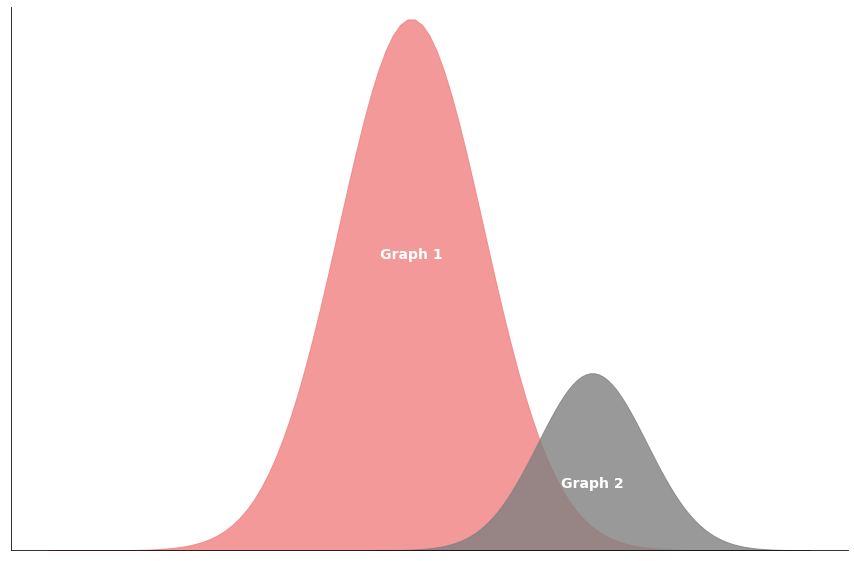

In [48]:
two_pdfs(sigma=0.4,sigma2=0.3,delta_mu=1,size_proportion=4)